# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## Importing libraries and acquiring data

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn import datasets, linear_model, metrics 

data=pd.read_csv("../data/lego_final.csv")

from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

## define task 2

In [86]:
# Write solution for task 2 here
print(train_dataset.columns.values)
print(train_dataset.shape)
#this tells us all the colums that we will be dealing with
print(train_dataset.head())
print('-'*35)
print(train_dataset.info())
print('-'*35)
# print(train_dataset.describe())


['ages' 'list_price' 'num_reviews' 'piece_count' 'play_star_rating'
 'review_difficulty' 'star_rating' 'theme_name' 'val_star_rating'
 'country']
(9808, 10)
       ages  list_price  num_reviews  piece_count  play_star_rating  \
5903      0     12.1878            1          136               0.0   
5501     19     15.6000           40          125               4.5   
5865     13     24.3878            0          115               0.0   
10825    11     35.4929            3           28               4.3   
8722     19     32.9278            6          229               4.4   

       review_difficulty  star_rating  theme_name  val_star_rating  country  
5903                   5          5.0           4              0.0        8  
5501                   4          4.7          34              4.8        7  
5865                   5          0.0          21              0.0        8  
10825                  0          4.3          13              3.3       17  
8722                   2  

## define task 3


 mu = 65.14 and sigma = 91.54



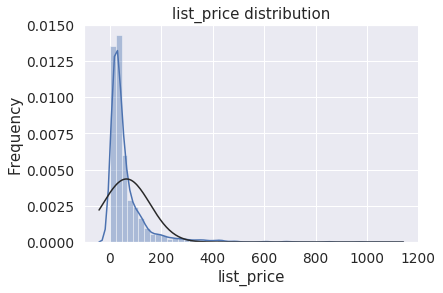

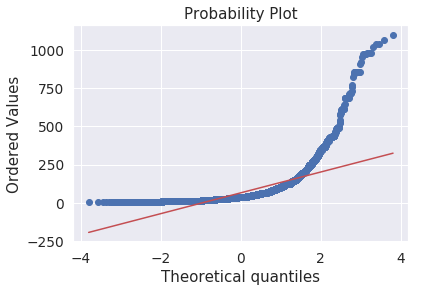

Skewness: 4.589194
Kurtosis: 30.274335


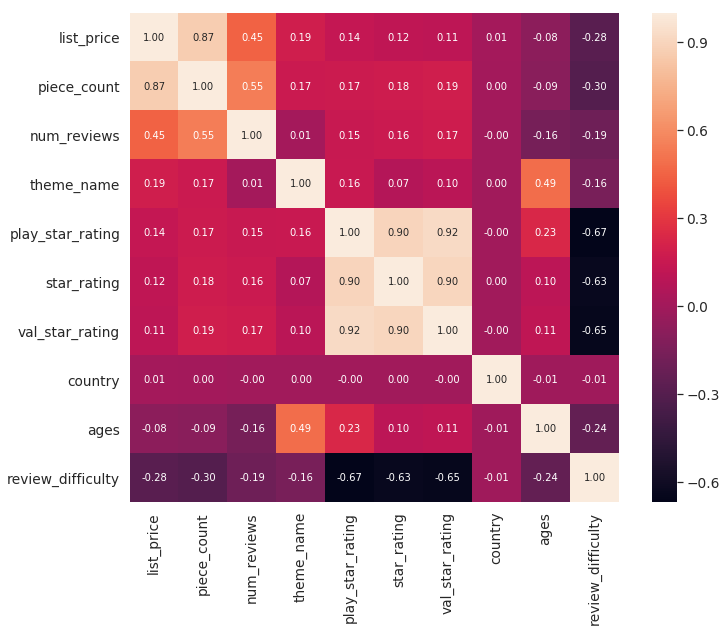

In [87]:
# Write solution for task 3 here
sns.distplot(train_dataset['list_price'], fit = norm)

(mu, sigma) = norm.fit(train_dataset['list_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
# plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
#             loc='best')
plt.ylabel('Frequency')
plt.title('list_price distribution')

fig = plt.figure()
res = stats.probplot(train_dataset['list_price'], plot=plt)
plt.show()

print("Skewness: %f" % train_dataset['list_price'].skew())
print("Kurtosis: %f" % train_dataset['list_price'].kurt())



corrmat = train_dataset.corr()
f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);



k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'list_price')['list_price'].index
cm = np.corrcoef(train_dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## define task 4

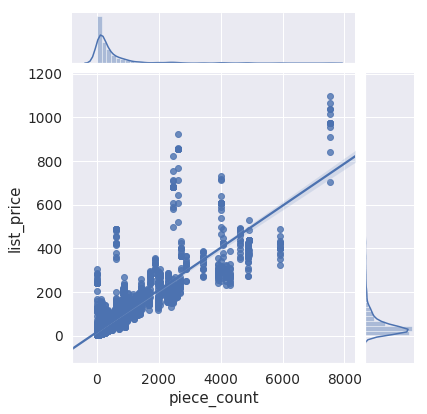

In [88]:
# Write solution for task 4 here 
# var = 'piece_count'
# data = pd.concat([train_dataset['list_price'], train_dataset[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
# fig = sns.boxplot(x=var, y="list_price", data=data)
# fig.axis(ymin=0, ymax=1200)



sns.jointplot(x=train_dataset['piece_count'], y=train_dataset['list_price'], kind='reg')




0.4486136540757351 and now it is 0.5193384953362212


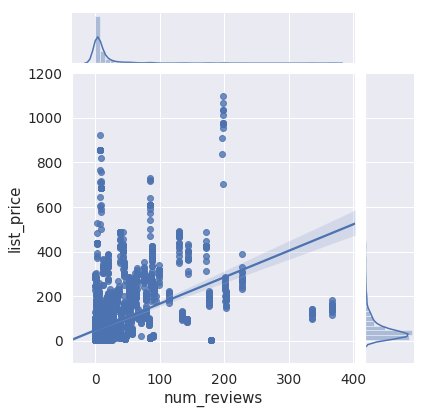

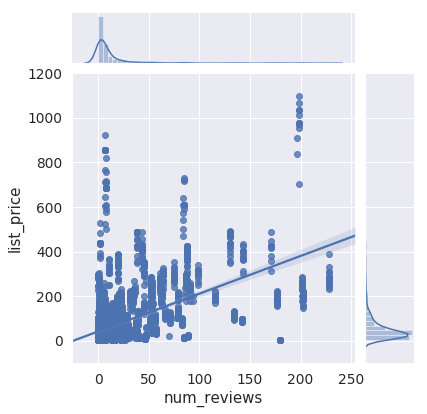

In [89]:
sns.jointplot(x=train_dataset['num_reviews'], y=train_dataset['list_price'], kind='reg')
earlier=np.corrcoef(train_dataset['list_price'], train_dataset['num_reviews'])[0,1]

train_dataset = train_dataset.drop(train_dataset[(train_dataset['num_reviews']>300) & (train_dataset['list_price']<400)].index).reset_index(drop=True)
sns.jointplot(x=train_dataset['num_reviews'], y=train_dataset['list_price'], kind='reg')
after=np.corrcoef(train_dataset['list_price'], train_dataset['num_reviews'])[0,1]

print(str(earlier) + " and now it is " + str(after))

0.19000223424617124

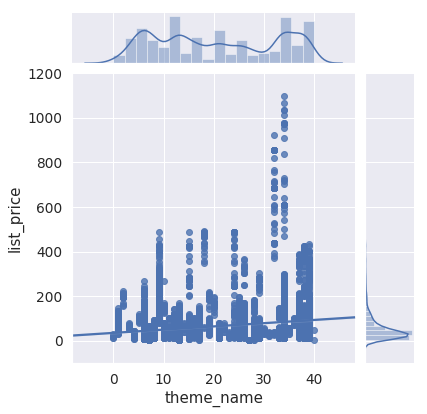

In [94]:
sns.jointplot(x=train_dataset['theme_name'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['theme_name'])[0,1]
earlier

/home/ujjval/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.1429320122410646

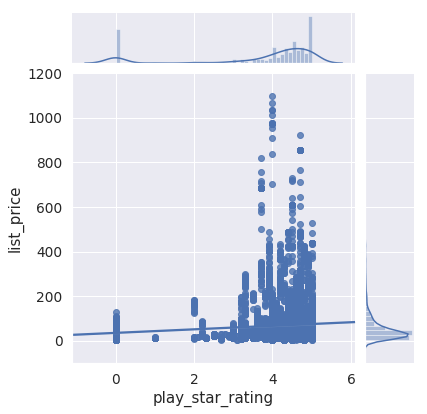

In [97]:
sns.jointplot(x=train_dataset['play_star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['play_star_rating'])[0,1]
# print("Earlier: " + str(earlier))
earlier

0.12541592781869754

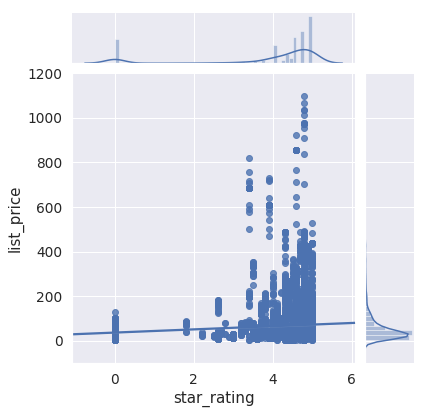

In [98]:
sns.jointplot(x=train_dataset['star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['star_rating'])[0,1]
earlier

/home/ujjval/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.11268309671477143

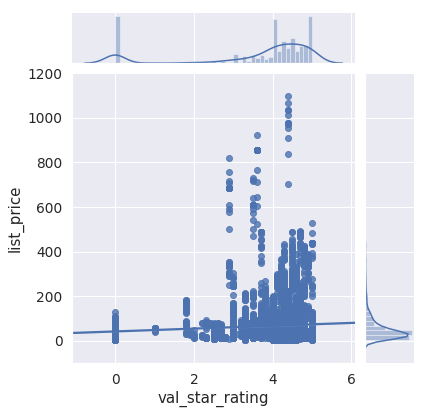

In [99]:
sns.jointplot(x=train_dataset['val_star_rating'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['val_star_rating'])[0,1]
earlier

/home/ujjval/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.013094022583086817

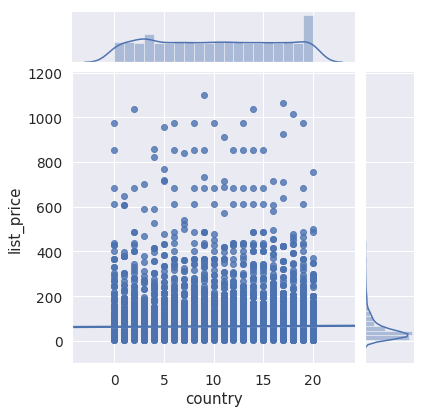

In [100]:
sns.jointplot(x=train_dataset['country'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['country'])[0,1]
earlier
#As we can see in the graph and also from the correlation coefficient,
#country name hardly effects the price of lego. So we will remove this feature,
#to train the model better.

-0.07301688760690915

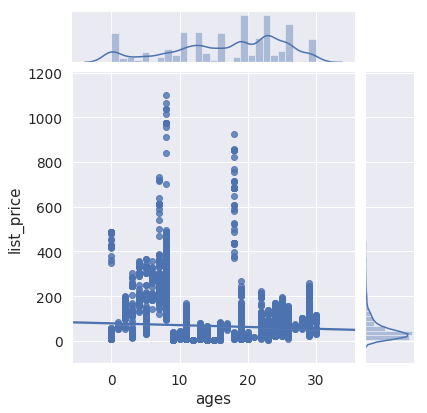

In [104]:
sns.jointplot(x=train_dataset['ages'], y=train_dataset['list_price'], kind='reg')
earlier = np.corrcoef(train_dataset['list_price'], train_dataset['ages'])[0,1]
earlier
#Correlation coefficient says that it affects the price of lego-set by only a little amount
# so we may try to remove this feature too.

## define task 4

In [91]:
train_Y=train_dataset['list_price']
train_X=train_dataset.drop(['list_price'], axis=1)
test_Y=test_dataset['list_price']
test_X=test_dataset.drop(['list_price'], axis=1)
# train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.33, random_state=42)

reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(train_X, train_Y) 
print('Variance score: {}'.format(reg.score(test_X, test_Y))) 


Variance score: 0.7863642292419029
